### Importing Packages

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [101]:
plt.style.use('ggplot')

In [102]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [103]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [104]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Exploring Data

In [106]:
data = pd.read_csv('/content/Reviews.csv')

In [107]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [108]:
data['Text'].values[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [109]:
data.shape

(568454, 10)

In [110]:
data['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

[]

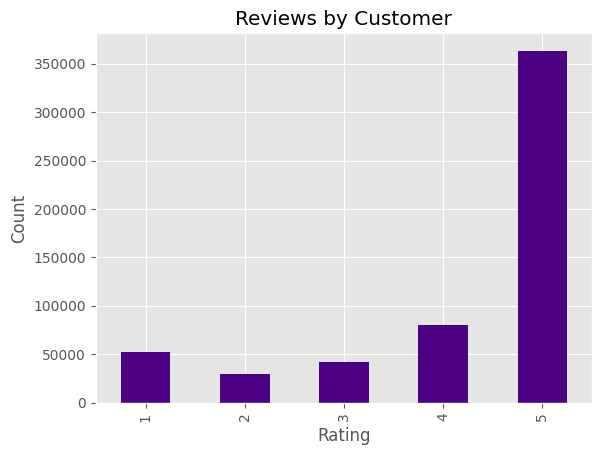

In [111]:
plt = data["Score"].value_counts().sort_index().plot(
    kind="bar",
    title="Reviews by Customer",
    color="indigo"
)

plt.set_xlabel("Rating")
plt.set_ylabel("Count")
plt.plot()

[]

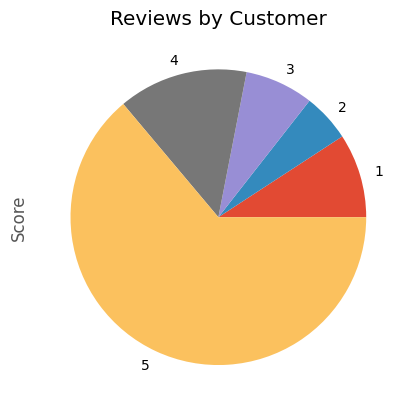

In [112]:
plt = data["Score"].value_counts().sort_index().plot(
    kind="pie",
    title="Reviews by Customer"
)

plt.plot()

In [113]:
data["UserId"].value_counts()

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A2O8OFVSTO9PF3      1
A1C6KXG47GAQ7B      1
A1TU5DS89D9OVD      1
A3N005JS5FG5FI      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [114]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

### Preparing the Data

In [115]:
data = data.head(1000) # Now the data has only first 1000 rows

In [116]:
sentence = data["Text"][1]

In [117]:
print(sentence)

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


#### Tokenization

In [118]:
tokens = nltk.word_tokenize(sentence)

In [119]:
tokens

['Product',
 'arrived',
 'labeled',
 'as',
 'Jumbo',
 'Salted',
 'Peanuts',
 '...',
 'the',
 'peanuts',
 'were',
 'actually',
 'small',
 'sized',
 'unsalted',
 '.',
 'Not',
 'sure',
 'if',
 'this',
 'was',
 'an',
 'error',
 'or',
 'if',
 'the',
 'vendor',
 'intended',
 'to',
 'represent',
 'the',
 'product',
 'as',
 '``',
 'Jumbo',
 "''",
 '.']

#### Frequency Distribution

In [120]:
from nltk.probability import FreqDist

In [121]:
freq_dist = FreqDist(tokens)

In [122]:
freq_dist

FreqDist({'the': 3, 'as': 2, 'Jumbo': 2, '.': 2, 'if': 2, 'Product': 1, 'arrived': 1, 'labeled': 1, 'Salted': 1, 'Peanuts': 1, ...})

In [123]:
freq_dist.most_common(3)

[('the', 3), ('as', 2), ('Jumbo', 2)]

In [124]:
from nltk.corpus import stopwords

In [125]:
stopwords = set(stopwords.words('english'))

In [126]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

#### POS Tagging

In [127]:
from nltk.tag import pos_tag

In [128]:
part_of_speech = pos_tag(tokens)

In [129]:
part_of_speech

[('Product', 'NNP'),
 ('arrived', 'VBD'),
 ('labeled', 'VBN'),
 ('as', 'IN'),
 ('Jumbo', 'NNP'),
 ('Salted', 'NNP'),
 ('Peanuts', 'NNP'),
 ('...', ':'),
 ('the', 'DT'),
 ('peanuts', 'NNS'),
 ('were', 'VBD'),
 ('actually', 'RB'),
 ('small', 'JJ'),
 ('sized', 'VBN'),
 ('unsalted', 'JJ'),
 ('.', '.'),
 ('Not', 'RB'),
 ('sure', 'JJ'),
 ('if', 'IN'),
 ('this', 'DT'),
 ('was', 'VBD'),
 ('an', 'DT'),
 ('error', 'NN'),
 ('or', 'CC'),
 ('if', 'IN'),
 ('the', 'DT'),
 ('vendor', 'NN'),
 ('intended', 'VBN'),
 ('to', 'TO'),
 ('represent', 'VB'),
 ('the', 'DT'),
 ('product', 'NN'),
 ('as', 'IN'),
 ('``', '``'),
 ('Jumbo', 'NNP'),
 ("''", "''"),
 ('.', '.')]

### Vader Sentiment Analysis

In [130]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [131]:
SIA = SentimentIntensityAnalyzer()

In [132]:
## Example:
SIA.polarity_scores("Hi, I am not so much good")

{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'compound': -0.3843}

In [133]:
#create empty dictionary to store results
results={}
for i,row in tqdm(data.iterrows(),total=len(data)):
    text=row['Text']
    myid=row['Id']
    results[myid]=SIA.polarity_scores(text)
Vaders=pd.DataFrame(results).T
Vaders= Vaders.reset_index().rename(columns={'index': 'Id'})
Vaders=Vaders.merge(data,how='left')
Vaders

  0%|          | 0/1000 [00:00<?, ?it/s]

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,0.063,0.874,0.062,-0.0129,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


### RoBERTa  Model

In [134]:
! pip install transformers

In [135]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [136]:
# Loading the pretrained model
model = f"cardiffnlp/twitter-roberta-base-sentiment"

In [137]:
tokenizer = AutoTokenizer.from_pretrained(model)

In [138]:
model = AutoModelForSequenceClassification.from_pretrained(model)

In [139]:
def roBERTa_polarity_scores(sentence):
  encoded_text = tokenizer(sentence, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)

  scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }

  return scores_dict

In [140]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = SIA.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = roBERTa_polarity_scores(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke at id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke at id 83
Broke at id 187
Broke at id 529
Broke at id 540
Broke at id 746
Broke at id 863


In [141]:
results_df = pd.DataFrame(res).T

In [142]:
results_df = results_df.reset_index().rename(columns={'index': 'Id'})

In [143]:
results_df = results_df.merge(data, how='left')

In [ ]:
results_df